In [1]:
from __future__ import division
import sys
home_dir=!echo "$HOME"
sys.path.insert(2,home_dir[0]+'/iPyNb/NERSC_Import') 

from pyROOT_import import *
from mpl_numpy_scipy_import import *
from aLib_import import *
from ROOT import TString

In [2]:
%pylab inline  
#always do this for plotting...  don't ask why
#now set the size of figures to display in window
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
g1=0.1167
g2=12.05

g1=0.105
g2=18.3

g1DD=g1*0.982
g2DD=g2*0.954

<h1> 2D Normal fitting  </h1>

In [4]:
import scipy.optimize as opt
import numpy as np

def twoD_Gaussian((x, y), amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()

In [5]:
#c1 = rootnotes.default_canvas(size=(400,300)) # use TCanvas
#c1.SetGridx()
#c1.SetGridy()

<h1> Load in all the LUX Run03 WIMP Search Data </h1>

In [6]:
'''
chain6 = TChain('golden')
chain5.Add('/project/projectdirs/lux/data/golden/Golden_CH3T_*.root')

chain5 = TChain('golden')
chain4.Add('/project/projectdirs/lux/data/golden/Golden_DD_*.root')

chain4 = TChain('golden')
chain3.Add('/project/projectdirs/lux/data/golden/Golden_Cs137_Aug.root')

chain3 = TChain('golden')
chain2.Add('/project/projectdirs/lux/data/golden/Golden_XeAct/*.root')

chain2 = TChain('golden')
chain.Add('/project/projectdirs/lux/users/acurrie/Run3_DP2.0/*.root')

chain = TChain('golden')
chain.Add('/project/projectdirs/lux/data/golden/Golden_Run04/*.root')

chain.Add('/project/projectdirs/lux/data/golden/Run04_Cs.root')

'''

chain = TChain('filter')
chain.Add('/global/projecta/projectdirs/lux/data/golden/allRun4/*.root')

chain_live = TChain('live')
chain_live.Add('/global/projecta/projectdirs/lux/data/golden/allRun4/*.root')

77

In [7]:
root_numpy.list_branches('/global/projecta/projectdirs/lux/data/golden/allRun4/outp_tb1_UCSB1_0205_1S1_1S2_13.root','live')

TClass::TClass:0: RuntimeWarning: no dictionary for class LUX_S1 is available
TClass::TClass:0: RuntimeWarning: no dictionary for class LUX_S2 is available


['acquisition', 'acqLivetimeHours', 'acqFilteredEvents', 'totalLivetimeHours']

In [8]:
live= root2array('/global/projecta/projectdirs/lux/data/golden/allRun4/*.root','live')

/global/project/projectdirs/lux/Tools/anaconda/lib/python2.7/site-packages/root_numpy/_tree.py:205: RootNumpyUnconvertibleWarning: cannot convert leaf 'acquisition' of branch 'acquisition' with type 'TString' (skipping)
  weight_name)


In [9]:
#function to extract TString acquisition names and make a list
acq_list=[]
acq = TString()
chain_live.SetBranchAddress("acquisition", acq)
for ii in range(len(live)):
    chain_live.GetEntry(ii)
    acq_list.append(acq.Data())

In [10]:
GoldenDays=acq_list
Golden_Livetime = live['acqLivetimeHours']
Golden_Livetime_days=Golden_Livetime/24

<h1> Get Livetime Info </h1>

In [11]:
GoldenDays=acq_list
Golden_Livetime = live['acqLivetimeHours']
Golden_Livetime_days=Golden_Livetime/24

GoldenFile_dates=[]
for ii in range(0,len(GoldenDays)):
    GoldenFile_dates.append(parser.parse(GoldenDays[ii][6:19]))

GoldenFile_dates=array(GoldenFile_dates)

lux_epoch=md.datestr2num('Jan 1st 2011 at 00:00')
Run04Golden_lux_stamps=(md.date2num(GoldenFile_dates)-lux_epoch)*24*3600*10**8
Run04Golden_lux_stamps=uint64(Run04Golden_lux_stamps) #set to uint64 type

<h1> Define the S1 and S2 cuts to seperate the islands of energy (see later plots) </h1>

In [12]:
Energies=[2.8]
NamesE=["2.8 keV, 5.2 keV X-ray, 41.55 keV"]
cutsE=array([[1.5, 3.8],
           [3.8,6.5],[35,50]])


mean_s2=zeros(len(Energies))
mean_s2_sig=zeros(len(Energies))
mean_s1=zeros(len(Energies))
mean_s1_sig=zeros(len(Energies))

<h1> 2.8 and 5.2 keV lines in the WS data </h1>

<h3> First plot the WS data, with 3 sigma ER band as per the tiritum calibration </h3>

In [9]:
#c1.Clear()

In [46]:
c1 = rootnotes.default_canvas(name='icanvas', size=(1200, 1000))

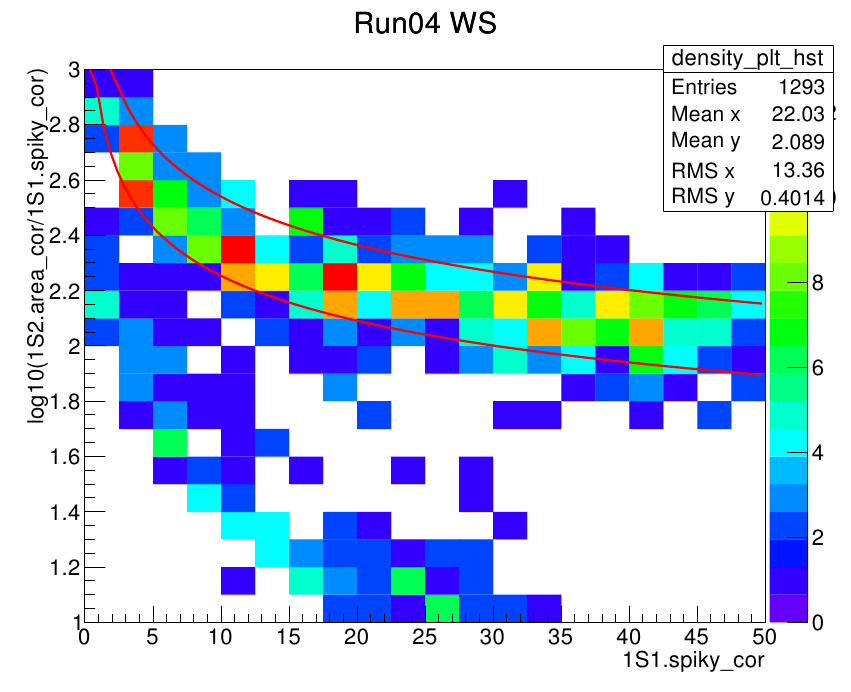

In [47]:
#95% ER bounds from tritium (Run03)

au = 3.22 #use 3.10 for 2 sigma bounds #90% 3.007
bu = -0.103  
al = 2.89; # use 2.592 #90% 2.682
bl =-0.108;

er_cut_l=TCut('log10(1S2.area_cor/1S1.spiky_cor)>{:g}*1S1.spiky_cor^{:g}'.format(al,bl))
er_cut_u=TCut('log10(1S2.area_cor/1S1.spiky_cor)<{:g}*1S1.spiky_cor^{:g}'.format(au,bu))

fid_vol=TCut('1S2.drift>50 && 1S2.drift<300 && 1S2.rad_delensed <20')
exclude_time = TCut('((luxstamp<13112550000000000) || (luxstamp>13115514000000358))') # removes 4-hour Feb 2015 acquisition with residual CH3T
drift_cut = TCut('1S2.drift>0 && 1S2.drift<450')
close2end = TCut('close2End==0 && 1S1.partner<=0')
areasWS_cut = TCut('1S1.spiky_cor>1 && 1S1.area_cor<150 && 1S2.area>175 && 1S2.area_cor<10000')
badareaCut = TCut('((goodarea<=253 && badarea<80) || (goodarea>253 && badarea<(80*(((10**(-2.4))*goodarea)**0.4668))))')
# Up to now, this is golden for Run04

combined_cut = TCut(fid_vol.GetTitle() + '&&' + exclude_time.GetTitle() + ' && ' + drift_cut.GetTitle() + ' && ' + close2end.GetTitle() + ' && ' + badareaCut.GetTitle() + ' && ' + areasWS_cut.GetTitle());# + ' && ' + areasKr_cut.GetTitle());

density_plt_hst=TH2F('density_plt_hst','Run04 WS;1S1.spiky_cor;log10(1S2.area_cor/1S1.spiky_cor)',20,0,50,20,1,3)
#density_plt_hst=TH2F('density_plt_hst','Run04 WS;spikyS1;s2area)',30,0,50,30,800,5000)

#chain2.SetMarkerStyle(6)
#chain2.SetMarkerSize(10)
n=chain.Draw('log10(1S2.area_cor/1S1.spiky_cor):1S1.spiky_cor>>density_plt_hst',combined_cut,'colz') # WS is chain, chain2 is XeAct, chain3 is Cs137, 4 is DD
#n=chain.Draw('s2area:spikyS1>>density_plt_hst',combined_cut,'colz') # WS is chain, chain2 is XeAct, chain3 is Cs137, 4 is DD


fun1 = TF1( 'fun1', '{:g}*x^{:g}'.format(al,bl), 0.1, 50)
fun2 = TF1( 'fun1', '{:g}*x^{:g}'.format(au,bu), 0.1, 50)
fun1.Draw('Same')
fun2.Draw('Same')

c1

<h1> Plot the spacial distribution </h1>

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: density_plt_hst (Potential memory leak).


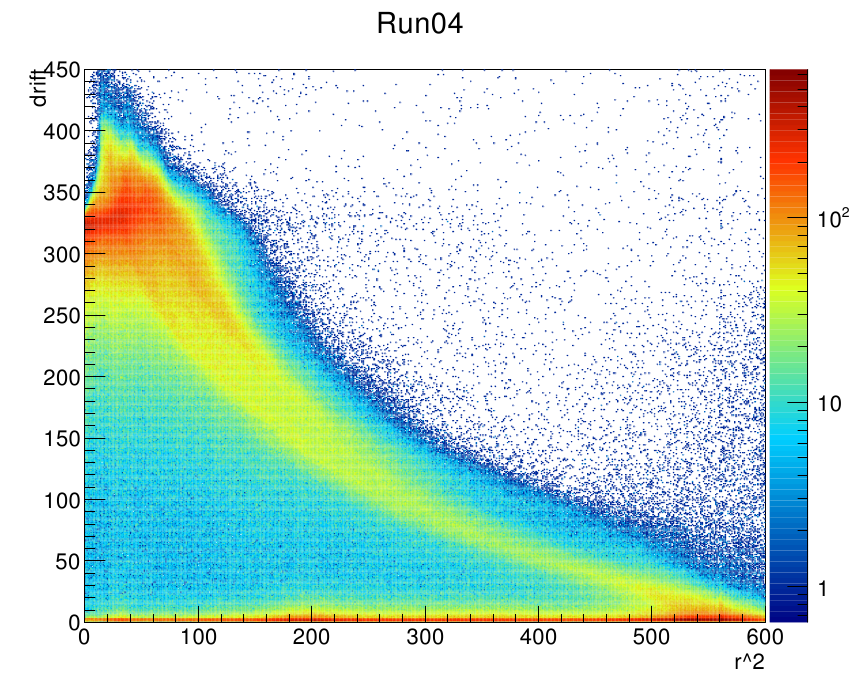

In [21]:
c_rz = rootnotes.default_canvas(name='icanvas2', size=(1200, 1000))
fid_vol=TCut('1S2.drift>70 && 1S2.drift<300 && 1S2.rad_delensed <20')
exclude_time = TCut('((luxstamp<13112550000000000) || (luxstamp>13115514000000358))') # removes 4-hour Feb 2015 acquisition with residual CH3T
drift_cut = TCut('1S2.drift>0 && 1S2.drift<450')
close2end = TCut('close2End==0 && 1S1.partner<=0')
areasWS_cut = TCut('1S1.area_cor>1 && 1S1.area_cor<1e4 && 1S2.area>175 && 1S2.area_cor<1e6')
badareaCut = TCut('((goodarea<=253 && badarea<80) || (goodarea>253 && badarea<(80*(((10**(-2.4))*goodarea)**0.4668))))')
energy_cut=TCut('1/73*(1S1.spiky_cor/{:g}+1S2.area_cor/{:g})>{:g} && 1/73*(1S1.spiky_cor/{:g}+1S2.area_cor/{:g})<{:g}'
               .format(g1,g2,2,g1,g2,3))

combined_cut = TCut(exclude_time.GetTitle() + ' && ' + drift_cut.GetTitle() \
                    + ' && ' + close2end.GetTitle() + ' && ' + areasWS_cut.GetTitle());# + ' && ' + areasKr_cut.GetTitle());

density_plt_hst=TH2F('density_plt_hst','Run04 ;r^2;drift',500,0,600,500,0,450) #include Kr
chain.Draw('1S2.drift:1S2.rad_raw**2>>density_plt_hst',combined_cut,'colz')
#rad_delensed

#.Draw('1S2.drift:1S2.rad_raw**2',combined_cut+fid_vol+energy_cut) #s1area



c_rz.SetLogz()
gStyle.SetOptStat(0)
gStyle.SetPalette(55)
gStyle.SetNumberContours(100)


c_rz

<h1> Plot charge vs light </h1>

In [46]:
#c2.Clear()
c2 = rootnotes.default_canvas(name='icanvas2', size=(1200, 1000))

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: density_plt_hst (Potential memory leak).


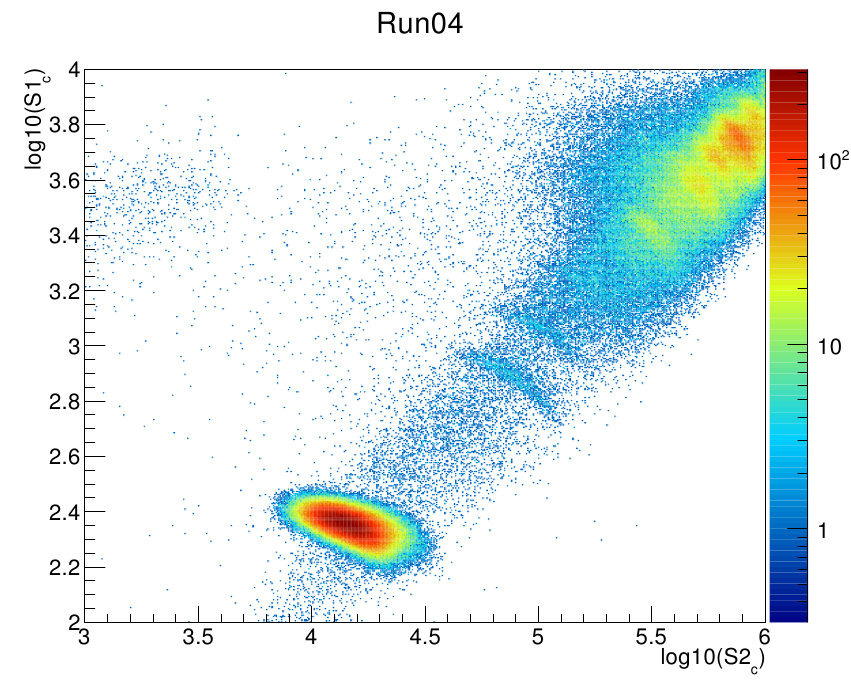

In [53]:
fid_vol=TCut('1S2.drift>70 && 1S2.drift<300 && 1S2.rad_delensed <20')
exclude_time = TCut('((luxstamp<13112550000000000) || (luxstamp>13115514000000358))') # removes 4-hour Feb 2015 acquisition with residual CH3T
drift_cut = TCut('1S2.drift>0 && 1S2.drift<450')
close2end = TCut('close2End==0 && 1S1.partner<=0')
areasWS_cut = TCut('1S1.area_cor>1 && 1S1.area_cor<1e4 && 1S2.area>175 && 1S2.area_cor<1e6')
badareaCut = TCut('((goodarea<=253 && badarea<80) || (goodarea>253 && badarea<(80*(((10**(-2.4))*goodarea)**0.4668))))')

combined_cut = TCut(fid_vol.GetTitle() + '&&' + exclude_time.GetTitle() + ' && ' + drift_cut.GetTitle() + ' && ' + close2end.GetTitle() + ' && ' + areasWS_cut.GetTitle());# + ' && ' + areasKr_cut.GetTitle());

density_plt_hst=TH2F('density_plt_hst','Run04 ;log10(S2_{c});log10(S1_{c})',500,3,6,500,2,4) #include Kr
chain.Draw('log10(1S1.area_cor):log10(1S2.area_cor)>>density_plt_hst',combined_cut,'colz')

c2.SetLogz()
gStyle.SetOptStat(0)
gStyle.SetPalette(55)
gStyle.SetNumberContours(100)
c2

<h1> Now histogram the ER events at low energy (around 3 sigma as defined by tritium) </h1>

In [112]:
#c3.Clear()

In [22]:
c3 = rootnotes.canvas(name='icanvas22', size=(1200, 1000))

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: density_plt_hst (Potential memory leak).


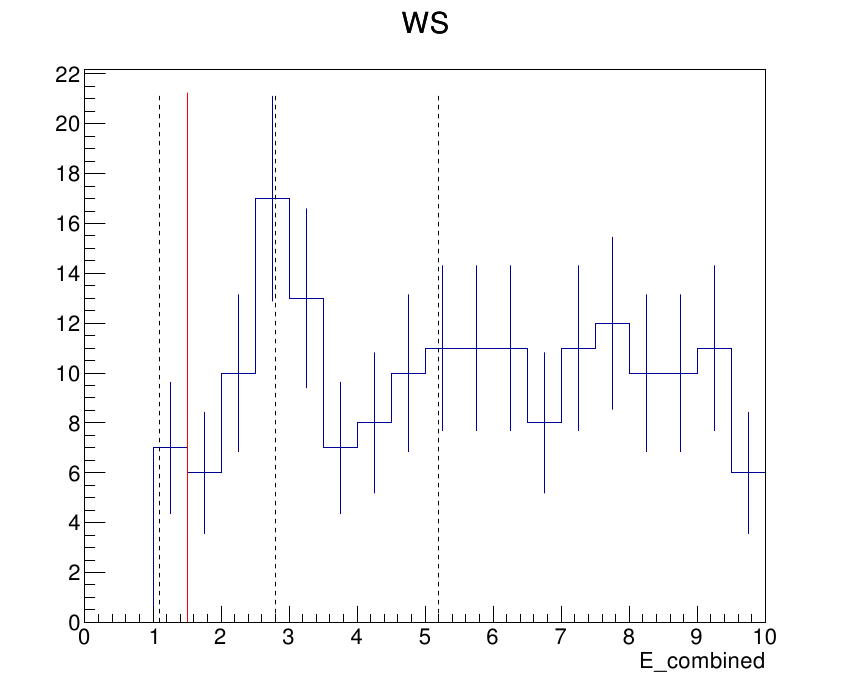

In [28]:
g1=0.105
g2=18.3

au = 3.22 # 1.28 sigma, 10% to 90% interval
bu = -0.103  
al = 2.89; # use 2.592 #90% 2.682
bl =-0.108;

er_cut_l=TCut('log10(1S2.area_cor/1S1.spiky_cor)>{:g}*1S1.spiky_cor^{:g}'.format(al,bl))
er_cut_u=TCut('log10(1S2.area_cor/1S1.spiky_cor)<{:g}*1S1.spiky_cor^{:g}'.format(au,bu))

fid_vol=TCut('1S2.drift>75 && 1S2.drift<290 && 1S2.rad_delensed <18')
exclude_time = TCut('((luxstamp<13112550000000000) || (luxstamp>13115514000000358))') # removes 4-hour Feb 2015 acquisition with residual CH3T
drift_cut = TCut('1S2.drift>0 && 1S2.drift<450')
close2end = TCut('close2End==0 && 1S1.partner<=0')
areasWS_cut = TCut('1S1.spiky_cor>1 && 1S1.area_cor<150 && 1S2.area>175 && 1S2.area_cor<10000')
badareaCut = TCut('((goodarea<=253 && badarea<80) || (goodarea>253 && badarea<(80*(((10**(-2.4))*goodarea)**0.4668))))')

combined_cut = TCut(fid_vol.GetTitle() + '&&' + exclude_time.GetTitle() + ' && ' + drift_cut.GetTitle() + \
                    ' && ' + close2end.GetTitle() + ' && ' + badareaCut.GetTitle() + ' && ' + \
                    areasWS_cut.GetTitle() + '&&' + er_cut_l.GetTitle() + '&&' + er_cut_u.GetTitle() );# + ' && ' + areasKr_cut.GetTitle());

density_plt_hst=TH1F('density_plt_hst','WS;E_combined',20,0,10)
n=chain.Draw('1/73*(1S1.spiky_cor/{:g}+1S2.area_cor/{:g})>>density_plt_hst'.format(g1,g2),combined_cut) # WS is chain2 #  Cs is chain3
density_plt_hst.SetOption("EH")

aline=[]
Energies=[1.1,2.8,5.2] 
top=density_plt_hst.GetMaximum()*1.25

for ii, En in enumerate(Energies):
    aline.append(TLine(En,0,En,top))
    aline[ii].SetLineStyle(2)
    aline[ii].SetLineColor(1) #black =1
    aline[ii].Draw()

Thresh=TLine(1.5,0,1.5,top)#energy threshold
Thresh.SetLineColor(2)
Thresh.Draw()

amps=[]
means=[]
sigmas=[]
Texts=[]
'''
#density_plt_hst.Fit("gaus","","",cutsE[0,0],cutsE[0,1]);
total = TF1("total","gaus(0)+[3]",cutsE[0,0],cutsE[0,1])
total.SetParameters(array([10,2.5,1,5])) #initial guess
density_plt_hst.Fit(total,"R");
total.SetLineColor(2)
amps.append(density_plt_hst.GetFunction("total").GetParameter(0) )
means.append(density_plt_hst.GetFunction("total").GetParameter(1) )
sigmas.append(density_plt_hst.GetFunction("total").GetParameter(2) )


amps=array(amps)
means=array(means)
sigmas=array(sigmas)

for ii, mu in enumerate(means):
    Texts.append(TLatex(mu,amps[ii]*0.6,'#splitline{{#mu={:1.2g}}}{{#sigma={:1.2g}}}'.format(means[ii],sigmas[ii]) ))
    Texts[ii].SetTextSize(0.03)
    Texts[ii].Draw()

    
#density_plt_hst.Fit("gaus","","",cutsE[0,0],cutsE[0,1]);
#density_plt_hst.Fit("gaus","+","",3.8,6.5);

gStyle.SetOptFit(0) # superimpose fit results
'''

c3

<h1> Extend energy scale </h1>

In [50]:
#c4.Clear()

In [34]:
c4 = rootnotes.default_canvas(name='icanvas3', size=(1000, 800))

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: density_plt_hst (Potential memory leak).


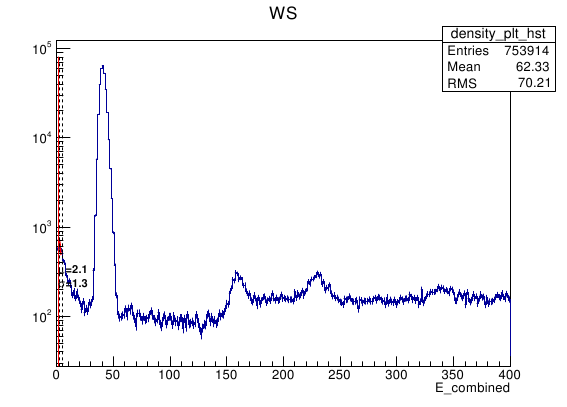

In [40]:
g1=0.105
g2=18.3

au = 3.22 #use 3.10 for 2 sigma bounds #90% 3.007
bu = -0.103  
al = 2.89; # use 2.592 #90% 2.682
bl =-0.108;

er_cut_l=TCut('log10(1S2.area_cor/1S1.spiky_cor)>{:g}*1S1.spiky_cor^{:g}'.format(al,bl))
er_cut_u=TCut('log10(1S2.area_cor/1S1.spiky_cor)<{:g}*1S1.spiky_cor^{:g}'.format(au,bu))

fid_vol=TCut('1S2.drift>70 && 1S2.drift<300 && 1S2.rad_delensed <22')
exclude_time = TCut('((luxstamp<13112550000000000) || (luxstamp>13115514000000358))') # removes 4-hour Feb 2015 acquisition with residual CH3T
drift_cut = TCut('1S2.drift>0 && 1S2.drift<450')
close2end = TCut('close2End==0 && 1S1.partner<=0')
areasWS_cut = TCut('1S1.area_cor>0 && 1S1.area_cor<1e5 && 1S2.area>175 && 1S2.area_cor<1e6')
badareaCut = TCut('((goodarea<=253 && badarea<80) || (goodarea>253 && badarea<(80*(((10**(-2.4))*goodarea)**0.4668))))')

combined_cut = TCut(fid_vol.GetTitle() + '&&' + exclude_time.GetTitle() + ' && ' + drift_cut.GetTitle() + \
                    ' && ' + close2end.GetTitle() + ' && ' + \
                    areasWS_cut.GetTitle() );# + ' && ' + areasKr_cut.GetTitle());
#no bad area cut and no ER cut

density_plt_hst=TH1F('density_plt_hst','WS;E_combined',300,0,400)
n=chain.Draw('1/73*(1S1.area_cor/{:g}+1S2.area_cor/{:g})>>density_plt_hst'.format(g1,g2),combined_cut) # WS is chain2 #  Cs is chain3
density_plt_hst.SetOption("EH")

aline=[]
Energies=[1.1,2.8,5.2] 
top=density_plt_hst.GetMaximum()*1.25

for ii, En in enumerate(Energies):
    aline.append(TLine(En,0,En,top))
    aline[ii].SetLineStyle(2)
    aline[ii].SetLineColor(1) #black =1
    aline[ii].Draw()

Thresh=TLine(1.5,0,1.5,top)#energy threshold
Thresh.SetLineColor(2)
Thresh.Draw()

amps=[]
means=[]
sigmas=[]
Texts=[]

#density_plt_hst.Fit("gaus","","",cutsE[0,0],cutsE[0,1]);
total = TF1("total","gaus(0)+[3]",cutsE[0,0],cutsE[0,1])
total.SetParameters(array([10,2.5,1,5])) #initial guess
density_plt_hst.Fit(total,"R");
total.SetLineColor(2)
amps.append(density_plt_hst.GetFunction("total").GetParameter(0) )
means.append(density_plt_hst.GetFunction("total").GetParameter(1) )
sigmas.append(density_plt_hst.GetFunction("total").GetParameter(2) )


amps=array(amps)
means=array(means)
sigmas=array(sigmas)

for ii, mu in enumerate(means):
    Texts.append(TLatex(mu,amps[ii]*0.6,'#splitline{{#mu={:1.2g}}}{{#sigma={:1.2g}}}'.format(means[ii],sigmas[ii]) ))
    Texts[ii].SetTextSize(0.03)
    Texts[ii].Draw()

    
#density_plt_hst.Fit("gaus","","",cutsE[0,0],cutsE[0,1]);
#density_plt_hst.Fit("gaus","+","",3.8,6.5);

gStyle.SetOptFit(0) # superimpose fit results
c4.SetLogy()

c4

<h1> Get luxstamps </h1>

In [50]:
energy_cut=TCut('1/73*(1S1.spiky_cor/{:g}+1S2.area_cor/{:g})>{:g} && 1/73*(1S1.spiky_cor/{:g}+1S2.area_cor/{:g})<{:g}'
               .format(g1,g2,2,g1,g2,3))

n=chain.Draw('luxstamp',combined_cut+energy_cut) #s1area

In [51]:
n

82L

In [52]:
stamps= ndarray( (n,),dtype= float64, buffer=chain.GetV1())
for ii in range(0,stamps.size):
    print("{:.0f},".format(stamps[ii]))

12415601197983422,
12426840855682408,
13122357248813364,
13122864358639692,
13187576646623632,
13208319781272396,
13291089003824712,
12781087691539632,
13058487967988536,
12461901515224696,
13261196972719132,
12519772587718540,
12483614160757612,
12544515251852694,
12659308480695376,
12664313026935432,
12678530570720254,
12694202447293332,
12722572264244824,
12751270746317368,
12875453789326990,
12883021822784180,
12885369939942710,
12893305959710132,
12897305409307248,
13068107188204626,
13072875242355178,
13950489444236380,
13970330844066220,
13999282175705774,
14818654561857880,
14848600252940264,
14861934240853104,
14925031272703000,
14943631127530556,
14943956608375458,
14066819805018136,
14072230332745864,
14598767594827748,
14619809960908306,
14656292500219352,
14767821309284980,
14777943372309288,
14893844404121146,
14938270753242548,
14015657063379796,
14021727575779370,
14114300831294232,
14169671268633528,
14350065732876616,
14366076258330428,
14381296560066564,
143924488583

In [ ]:
#c3.Clear()

In [52]:
c5 = rootnotes.default_canvas(name='3keV')

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: density_plt_hst2 (Potential memory leak).


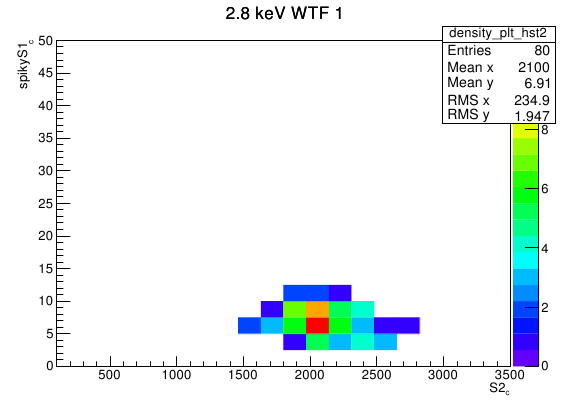

In [70]:
#chain.SetMarkerStyle(7)
#chain.SetMarkerSize(10)
#setup s2 vs s2 hist to get LY,QY
density_plt_hst2=TH2F('density_plt_hst2','2.8 keV WTF 1;S2_{c};spikyS1_{c}',20,100,3500,20,0,50)
energy_cut=TCut('1/73*(1S1.area_cor/{:g}+1S2.area_cor/{:g})>{:g} && 1/73*(1S1.area_cor/{:g}+1S2.area_cor/{:g})<{:g}'
               .format(g1,g2,2,g1,g2,3))


n=chain.Draw('1S1.area_cor:1S2.area_cor>>density_plt_hst2',combined_cut+energy_cut,'colz') #s1area

c5

In [76]:
s1 = ndarray( (n,),dtype= float64, buffer=chain.GetV1())
s2 = ndarray( (n,),dtype= float64, buffer=chain.GetV2())

In [77]:
s1.size

80

In [78]:
H, xedges, yedges = histogram2d(s2, s1, bins=7, range=None, normed=False)
H=H.T
x_bin_center=(xedges[:-1]+xedges[1:])/2
y_bin_center=(yedges[:-1]+yedges[1:])/2

initial_guess = (H.max(), mean(s2), mean(s1), std(s2), std(s1),0,0)
x, y = np.meshgrid(x_bin_center, y_bin_center)

popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), H.ravel(), p0=initial_guess)

mean_s2[0]=popt[1]
mean_s2_sig[0]=sqrt(pcov[1,1])
mean_s1[0]=popt[2]
mean_s1_sig[0]=sqrt(pcov[2,2])

In [79]:
#savetxt('Run04_Golden_Doke/fits/3keVfit.txt', popt, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ')
#savetxt('Run04_Golden_Doke/fits/3keVcov.txt', pcov, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ')

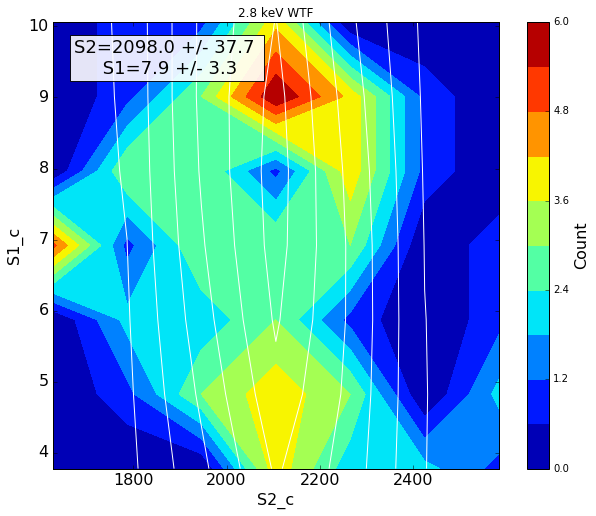

In [80]:
data_fitted = twoD_Gaussian((x, y), *popt)
figure
fig, ax = plt.subplots(1,1)
ax.hold(True)
#ax.imshow(H.reshape(x.shape), cmap=plt.cm.jet, origin='bottom',
#    extent=(x.min(), x.max(), y.min(), y.max()))
plt.contourf(x_bin_center,y_bin_center,H,10)
ax.contour(x, y, data_fitted.reshape(x.shape), 7, colors='w')
plt.xlabel('S2_c',fontsize=16)
plt.ylabel('S1_c',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cb=plt.colorbar()
cb.set_label('Count',fontsize=16)
plt.text(x.min()*1.15,y.max()*.95,'S2={:1.1f} +/- {:1.1f} \n S1={:1.1f} +/- {:1.1f}'.format(popt[1],sqrt(pcov[1,1]),popt[2],sqrt(pcov[2,2])),
         horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='w', alpha=0.9),fontsize=18)
plt.title('2.8 keV WTF')
#savefig('Run03_Golden_Doke/5keV_fit.pdf')

<h1> Check the R vs Z distribuation of the 2.8 keV events </h1>

In [81]:
#c4.Clear()
c6 = rootnotes.default_canvas(name='Ar_RZ', size=(1200, 1000))

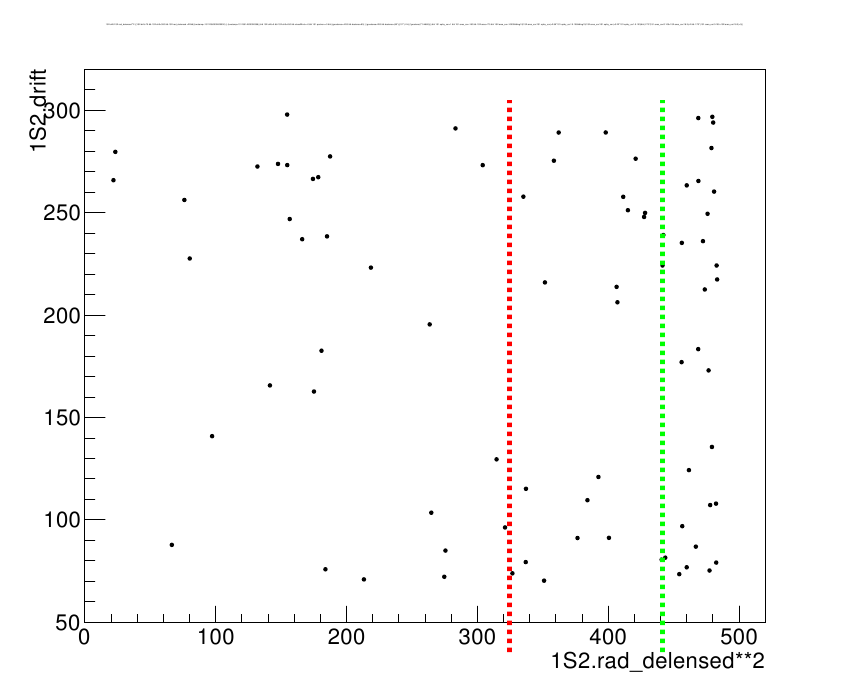

In [83]:
chain.SetMarkerStyle(7)
chain.SetMarkerSize(10)
#density_plt_hst=TH2F('density_plt_hst','5.2 keV x-ray 1;S2_{c};spikyS1_{c}',20,500,3500,20,1,50)
#density_plt_hst.Draw()
chain.Draw('1S2.drift:1S2.rad_delensed**2',combined_cut+energy_cut) #s1area

linR18=TLine(18**2,35.5,18**2,305)
linR18.SetLineColor(2)
linR18.SetLineStyle(2)
linR18.SetLineWidth(4)
linR18.Draw()

linR21=TLine(22**2,35.5,21**2,305)
linR21.SetLineColor(3)
linR21.SetLineStyle(2)
linR21.SetLineWidth(4)
linR21.Draw()
c6

In [84]:
c7 = rootnotes.default_canvas(name='Ar_XY', size=(1200, 1000))

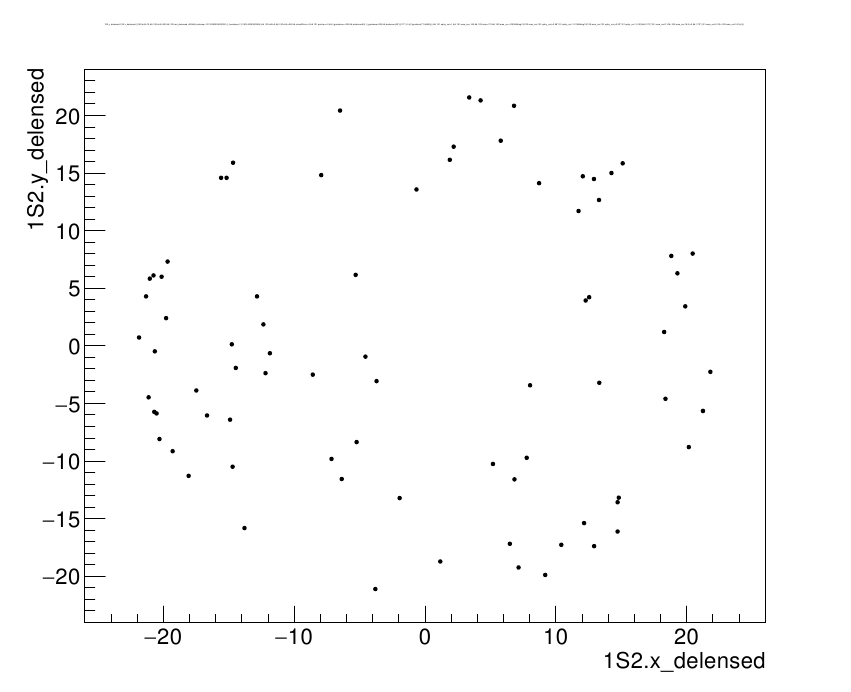

In [85]:
chain.SetMarkerStyle(7)
chain.SetMarkerSize(10)
#density_plt_hst=TH2F('density_plt_hst','5.2 keV x-ray 1;S2_{c};spikyS1_{c}',20,500,3500,20,1,50)
#density_plt_hst.Draw()
chain.Draw('1S2.y_delensed:1S2.x_delensed',combined_cut+energy_cut) #s1area

c7

<h1> luxstamp histogram </h1>

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: time_plt_hst (Potential memory leak).


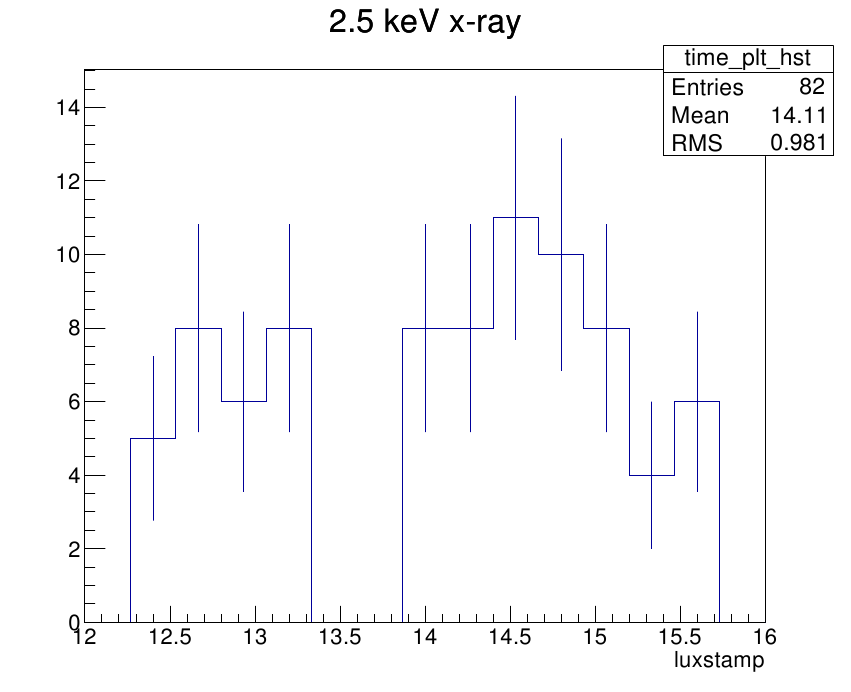

In [98]:
c8 = rootnotes.default_canvas(name='time_hist_2', size=(1200, 1000))

energy_cut=TCut('1/73*(1S1.spiky_cor/{:g}+1S2.area_cor/{:g})>{:g} && 1/73*(1S1.spiky_cor/{:g}+1S2.area_cor/{:g})<{:g}'
               .format(g1,g2,2,g1,g2,3))

time_plt_hst=TH1F('time_plt_hst','2.5 keV x-ray;luxstamp',15,12,16)
n=chain.Draw('luxstamp/10**15>>time_plt_hst',combined_cut + energy_cut)
time_plt_hst.SetOption("EH")

c8

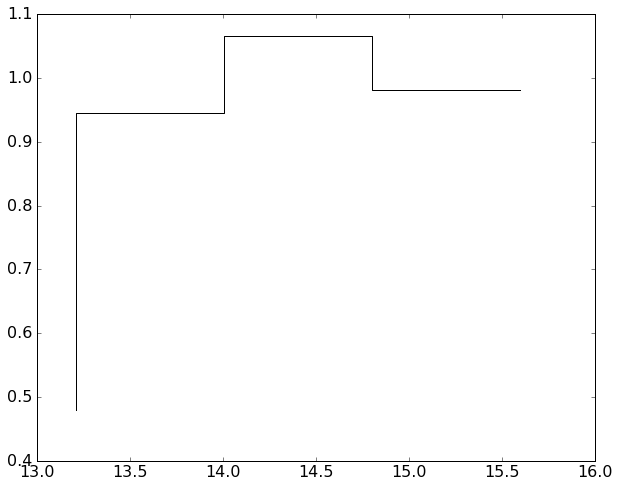

In [109]:
luxstamps = ndarray( (n,),dtype= float64, buffer=chain.GetV1())
luxstamps_hist, xedges = histogram(luxstamps,4) #linspace(7,8.5,10)
bin_center=(xedges[1:]+xedges[:-1])/2

livetime_in_bin=[]
for ii in range(0,luxstamps_hist.size):
    hist_cut=aLib.inrange(Run04Golden_lux_stamps/10**15,(xedges[ii],xedges[ii+1]))
    livetime_in_bin.append(Golden_Livetime_days[hist_cut].sum())

    
livetime_in_bin=array(livetime_in_bin)
plt.plot(xedges[1:],luxstamps_hist/livetime_in_bin,'k',drawstyle='steps')

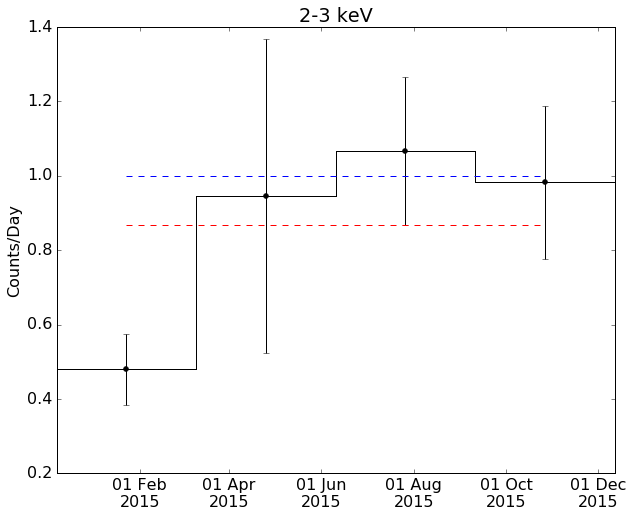

In [110]:
# convert luxstamp to date_num
lux_epoch=datestr2num('Jan 1st 2011 at 00:00')

luxstamp2day=bin_center*10**7/3600/24
luxstamp2day_edge_r=xedges[1:]*10**7/3600/24
luxstamp2day_edge_l=xedges[:-1]*10**7/3600/24

luxdatenum=luxstamp2day+lux_epoch
luxdatenum_edge_l=luxstamp2day_edge_l+lux_epoch
luxdatenum_edge_r=luxstamp2day_edge_r+lux_epoch

####################
fit_start=datestr2num('Apr 20 2014 at 00:00')
fit_end=datestr2num('Sep 1 2015 at 00:00')
fit_offset=1
fit_range=(luxdatenum>fit_start) & (luxdatenum<fit_end)
####################

#popt, pcov = curve_fit(funsin, (luxdatenum[fit_range]-luxdatenum[0]), (luxstamps_hist[fit_range]/livetime_in_bin[fit_range])-fit_offset,p0=(20,20,1),maxfev = 100000)

plt.plot_date(luxdatenum_edge_r,luxstamps_hist/livetime_in_bin,'k',drawstyle='steps')
plt.step(luxdatenum_edge_l,luxstamps_hist/livetime_in_bin,'k',where='post')
plt.errorbar(luxdatenum,luxstamps_hist/livetime_in_bin,sqrt(luxstamps_hist)/livetime_in_bin,fmt=".k",markersize=10)
#plt.plot_date([file_dates,file_dates],[zeros(file_dates.size),70*ones(file_dates.size)],'--r')

plt.rcParams.update({'font.size': 16}) #increase all fontsizes
ax = gca()
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d %b\n%Y'))
plt.ylabel('Counts/Day')

#plot fit
#plt.plot(luxdatenum[fit_range], funsin((luxdatenum[fit_range]-luxdatenum[0]), *popt)+fit_offset, 'r-', label="Fitted Curve")

#plt.text(luxdatenum.max(),luxstamps_hist.max()/livetime_in_bin.max(),'T_1/2={:1.1f} +/- {:1.1f} days'.format(popt[1]*log(2),sqrt(pcov[1,1])*log(2)),
#         horizontalalignment='right', verticalalignment='top', bbox=dict(facecolor='w', alpha=0.9),fontsize=18)
#plt.ylim([0,luxstamps_hist.max()/livetime_in_bin.max()*1.1])

plt.plot([luxdatenum.min(),luxdatenum.max()],[fit_offset,fit_offset],'--b')

#plot mean
plt.plot([luxdatenum.min(),luxdatenum.max()],[mean(luxstamps_hist/livetime_in_bin),mean(luxstamps_hist/livetime_in_bin)],'--r')

plt.title('2-3 keV')
